In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import datetime as dt

%matplotlib inline

When pulling in the AEPS 2017-2020 data set, we removed last 30 rows because there was insufficiant data and missing child ID's that would have not allowed us to analyze that data properly.

In [2]:
aeps_17_22 = pd.read_csv('../data/cleaned_AEPS.csv',nrows=17927)
aeps_17_22

C:\Users\kogan\AppData\Local\Temp\ipykernel_26188\365899996.py:1: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  aeps_17_22 = pd.read_csv('../data/cleaned_AEPS.csv',nrows=17927)


,Child ID,Program Name,AEPSi ID,AssessID,State,Child First,Child Last,DOB,Gender,Dev Status,...,Adapt Result,Cog Goal Score,Cog Cutoff,Cog Result,SC Goal Score,SC Cutoff,SC Result,Soc Goal Score,Soc Cutoff,Soc Result
0,11,Signal Centers,722747,10584304,TN,XXXXXX,XXXXXX,2020-02-02 00:00:00,M,Dev. Delay or Disability,...,above,17.0,20.0,below,11.0,13.0,below,9.0,9.0,below
1,10724,Little Tennessee Valley Educational Cooperative,707878,10575064,TN,XXXXXX,XXXXXX,2021-07-30 00:00:00,F,Dev. Delay or Disability,...,above,3.0,4.0,below,2.0,3.0,below,0.0,1.0,below
2,10724,Little Tennessee Valley Educational Cooperative,707878,10589703,TN,XXXXXX,XXXXXX,2021-07-30 00:00:00,F,Dev. Delay or Disability,...,above,5.0,4.0,above,3.0,3.0,below,2.0,1.0,above
3,11112,SRVS,665041,10535282,TN,XXXXXX,XXXXXX,2020-04-27 00:00:00,F,Dev. Delay or Disability,...,below,8.0,7.5,above,7.0,5.0,above,7.0,4.0,above
4,11112,SRVS,665041,10503223,TN,XXXXXX,XXXXXX,2020-04-27 00:00:00,F,Dev. Delay or Disability,...,below,5.0,4.0,above,5.0,3.0,above,5.0,1.0,above
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17922,525580\t,Signal Centers,728111,10599244,TN,XXXXXX,XXXXXX,2020-09-23 00:00:00,M,Dev. Delay or Disability,...,below,11.0,14.0,below,7.0,10.0,below,6.0,9.0,below
17923,525665\t,Kids Putnam,726427,10595337,TN,XXXXXX,XXXXXX,2020-09-08 00:00:00,F,Dev. Delay or Disability,...,below,6.0,14.0,below,7.0,10.0,below,2.0,9.0,below
17924,527045\t,Support Solutions of the Midsouth(formerly CS ...,728551,10599956,TN,XXXXXX,XXXXXX,2020-06-29 00:00:00,M,Dev. Delay or Disability,...,below,10.0,20.0,below,9.0,12.0,below,3.0,9.0,below
17925,527292\t,Waves,728028,10599127,TN,XXXXXX,XXXXXX,2020-11-23 00:00:00,F,Dev. Delay or Disability,...,above,16.0,14.0,above,9.0,10.0,below,6.0,9.0,below


In [3]:
aeps_17_22.columns

Index(['Child ID', 'Program Name', 'AEPSi ID', 'AssessID', 'State',
       'Child First', 'Child Last', 'DOB', 'Gender', 'Dev Status',
       ...
       'Adapt Result', 'Cog Goal Score', 'Cog Cutoff', 'Cog Result',
       'SC Goal Score', 'SC Cutoff', 'SC Result', 'Soc Goal Score',
       'Soc Cutoff', 'Soc Result'],
      dtype='object', length=307)

Here, we pulled all of the columns we found relevant from the AEPS 2017-2020 data set.

In [4]:
aeps_17_22 =aeps_17_22.loc[:,['Child ID','AEPSi ID','AssessID','DOB','Gender','Dev Status','AEPS Level','Test Date', 'Examiner',
                  'Chron Age','TEIS Point of Entry Office (POE)','ESL','County of Residence', 'fm_B4.0','fm_B5.0',
                  'cog_D2.0','cog_E2.0','cog_E4.0','cog_F1.0','cog_G1.0','cog_G2.0','cog_G3.0','cog_G4.0','cog_G5.0',
                  'cog_G6.0','sc_B1.0','sc_B2.0','sc_D1.0','sc_D2.0','sc_D3.0']]
aeps_17_22

,Child ID,AEPSi ID,AssessID,DOB,Gender,Dev Status,AEPS Level,Test Date,Examiner,Chron Age,...,cog_G2.0,cog_G3.0,cog_G4.0,cog_G5.0,cog_G6.0,sc_B1.0,sc_B2.0,sc_D1.0,sc_D2.0,sc_D3.0
0,11,722747,10584304,2020-02-02 00:00:00,M,Dev. Delay or Disability,1,2022-04-21 00:00:00,Maria E. Vives-Rodriguez,27.0,...,0.0,0.0,1.0,1.0,0.0,2.0,2.0,1.0,0.0,0.0
1,10724,707878,10575064,2021-07-30 00:00:00,F,Dev. Delay or Disability,1,2022-03-01 00:00:00,Olivia J Woodall,7.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,10724,707878,10589703,2021-07-30 00:00:00,F,Dev. Delay or Disability,1,2022-05-09 00:00:00,Olivia J Woodall,9.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,11112,665041,10535282,2020-04-27 00:00:00,F,Dev. Delay or Disability,1,2021-07-08 00:00:00,Beth Murphree,14.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,11112,665041,10503223,2020-04-27 00:00:00,F,Dev. Delay or Disability,1,2020-12-30 00:00:00,Beth Murphree,8.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17922,525580\t,728111,10599244,2020-09-23 00:00:00,M,Dev. Delay or Disability,1,2022-06-17 00:00:00,Doreen Lawton,21.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
17923,525665\t,726427,10595337,2020-09-08 00:00:00,F,Dev. Delay or Disability,1,2022-05-26 00:00:00,Krystal Prater,21.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
17924,527045\t,728551,10599956,2020-06-29 00:00:00,M,Dev. Delay or Disability,1,2022-06-23 00:00:00,D'Anitra Reynolds,24.0,...,0.0,0.0,0.0,0.0,0.0,2.0,1.0,0.0,0.0,0.0
17925,527292\t,728028,10599127,2020-11-23 00:00:00,F,Dev. Delay or Disability,1,2022-06-16 00:00:00,Ashley Cordell,19.0,...,0.0,1.0,0.0,0.0,0.0,0.0,2.0,1.0,0.0,0.0


In [5]:
aeps_17_22['Examiner'].str.strip()

0        Maria E. Vives-Rodriguez
1                Olivia J Woodall
2                Olivia J Woodall
3                   Beth Murphree
4                   Beth Murphree
                   ...           
17922               Doreen Lawton
17923              Krystal Prater
17924           D'Anitra Reynolds
17925              Ashley Cordell
17926             Colleen Drennen
Name: Examiner, Length: 17927, dtype: object

In [6]:
eco_exit_20_21 = pd.read_excel('../data/AEPSi_Data.xlsx',4,nrows = 8441)
eco_exit_20_21

,DISTRICT,CHILD_ID,ECO_Entry_DATE,Ent SOCIAL_SCALE,Ent KNOWLEDGE_SCALE,Ent APPROPRIATE_ACTION_SCALE,ECO_Exit_DATE,Exit SOCIAL_SCALE,Exit KNOWLEDGE_SCALE,Exit APPROPRIATE_ACTION_SCALE,...,OC2 - d,OC2 - e,OC2 Data Check,OC3 - a,OC3 - b,OC3 - c,OC3 - d,OC3 - e,OC3 Data Check,Days btw Initial and Exit
0,ET,456849,2019-04-24,3.0,5.0,7.0,2019-10-14,7.0,5.0,7.0,...,NaN,NaN,1,NaN,NaN,NaN,NaN,1.0,1,569
1,ET,490916,NaT,NaN,NaN,NaN,NaT,NaN,NaN,NaN,...,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,0,221
2,ET,426757,2019-03-13,2.0,3.0,4.0,2020-08-12,6.0,7.0,7.0,...,1.0,NaN,1,NaN,NaN,NaN,1.0,NaN,1,533
3,ET,480611,2020-05-28,2.0,5.0,1.0,2020-11-09,5.0,6.0,3.0,...,1.0,NaN,1,NaN,NaN,1.0,NaN,NaN,1,298
4,ET,492863,NaT,NaN,NaN,NaN,NaT,NaN,NaN,NaN,...,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,0,147
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8436,FT,422823,NaT,NaN,NaN,NaN,NaT,NaN,NaN,NaN,...,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,0,1012
8437,UC,457024,2019-04-05,5.0,5.0,5.0,2020-03-12,6.0,3.0,4.0,...,NaN,NaN,1,NaN,1.0,NaN,NaN,NaN,1,484
8438,UC,496398,NaT,NaN,NaN,NaN,NaT,NaN,NaN,NaN,...,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,0,91
8439,UC,486316,NaT,NaN,NaN,NaN,NaT,NaN,NaN,NaN,...,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,0,218


Here, we pulled all of the columns we found relevant from the ECO with Exit 20-21 data set.We also noticed that the ECO Entry date column and ECO Exit date column lined up with the Initial IFSP date column and Exit date column but the Initial IFSP date and Exit date columns were more conistent with their information and decided to do our analysis based off of the dates in those columns.

In [7]:
eco_exit_20_21 = eco_exit_20_21.loc[:,['DISTRICT','CHILD_ID','ECO_Entry_DATE','Ent SOCIAL_SCALE','Ent KNOWLEDGE_SCALE',
                                       'Ent APPROPRIATE_ACTION_SCALE','ECO_Exit_DATE','Exit SOCIAL_SCALE',
                                       'Exit KNOWLEDGE_SCALE','Exit APPROPRIATE_ACTION_SCALE','Exit IS_SOCIAL_PROGRESS',
                                       'Exit IS_KNOWLEDGE_PROGRESS','Exit IS_APPROPRIATE_ACTION_PROGRESS',
                                       'Initial IFSP Date','Exit Reason','Exit Date','OC2 - a','OC2 - b', 
                                       'OC2 - c','OC2 - d', 'OC2 - e','OC2 Data Check']]
eco_exit_20_21 

,DISTRICT,CHILD_ID,ECO_Entry_DATE,Ent SOCIAL_SCALE,Ent KNOWLEDGE_SCALE,Ent APPROPRIATE_ACTION_SCALE,ECO_Exit_DATE,Exit SOCIAL_SCALE,Exit KNOWLEDGE_SCALE,Exit APPROPRIATE_ACTION_SCALE,...,Exit IS_APPROPRIATE_ACTION_PROGRESS,Initial IFSP Date,Exit Reason,Exit Date,OC2 - a,OC2 - b,OC2 - c,OC2 - d,OC2 - e,OC2 Data Check
0,ET,456849,2019-04-24,3.0,5.0,7.0,2019-10-14,7.0,5.0,7.0,...,Yes,2019-04-24,618 - Part B eligible,2020-11-13,NaN,1.0,NaN,NaN,NaN,1
1,ET,490916,NaT,NaN,NaN,NaN,NaT,NaN,NaN,NaN,...,NaN,2020-11-02,618 - Parent withdraw,2021-06-11,NaN,NaN,NaN,NaN,NaN,0
2,ET,426757,2019-03-13,2.0,3.0,4.0,2020-08-12,6.0,7.0,7.0,...,Yes,2019-03-13,618 - Part B eligibility not determined,2020-08-27,NaN,NaN,NaN,1.0,NaN,1
3,ET,480611,2020-05-28,2.0,5.0,1.0,2020-11-09,5.0,6.0,3.0,...,Yes,2020-05-28,618 - Parent withdraw,2021-03-22,NaN,NaN,NaN,1.0,NaN,1
4,ET,492863,NaT,NaN,NaN,NaN,NaT,NaN,NaN,NaN,...,NaN,2020-12-02,618 - Parent withdraw,2021-04-28,NaN,NaN,NaN,NaN,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8436,FT,422823,NaT,NaN,NaN,NaN,NaT,NaN,NaN,NaN,...,NaN,2017-09-29,618 - Attempts to contact unsuccessful,2020-07-07,NaN,NaN,NaN,NaN,NaN,0
8437,UC,457024,2019-04-05,5.0,5.0,5.0,2020-03-12,6.0,3.0,4.0,...,Yes,2019-04-05,618 - Part B eligibility not determined,2020-08-01,NaN,1.0,NaN,NaN,NaN,1
8438,UC,496398,NaT,NaN,NaN,NaN,NaT,NaN,NaN,NaN,...,NaN,2021-02-23,618 - Parent withdraw,2021-05-25,NaN,NaN,NaN,NaN,NaN,0
8439,UC,486316,NaT,NaN,NaN,NaN,NaT,NaN,NaN,NaN,...,NaN,2020-08-25,618 - Parent withdraw,2021-03-31,NaN,NaN,NaN,NaN,NaN,0


In [8]:
eco_exit_21_22 = pd.read_excel('../data/AEPSi_Data.xlsx',6,nrows = 8632)
eco_exit_21_22

,DISTRICT,CHILD_ID,ECO_Entry_DATE,Ent SOCIAL_SCALE,Ent KNOWLEDGE_SCALE,Ent APPROPRIATE_ACTION_SCALE,ECO_Exit_DATE,Exit SOCIAL_SCALE,Exit KNOWLEDGE_SCALE,Exit APPROPRIATE_ACTION_SCALE,...,OC2 Data Check,OC3 - a,OC3 - b,OC3 - c,OC3 - d,OC3 - e,OC3 Data Check,Days btw Initial and Exit,Days btw I-IFSP to Exit ECO,Days btw I-IFSP to entry ECO
0,ET,500335,2021-04-23,5.0,3.0,4.0,2021-10-23,6.0,3.0,4.0,...,1,NaN,1.0,NaN,NaN,NaN,1,206,183,0
1,ET,479453,2020-03-23,7.0,7.0,7.0,2021-08-19,7.0,7.0,7.0,...,1,NaN,NaN,NaN,NaN,1.0,1,704,514,0
2,ET,510663,NaT,NaN,NaN,NaN,NaT,NaN,NaN,NaN,...,0,NaN,NaN,NaN,NaN,NaN,0,115,-44483,-44483
3,ET,452482,2019-01-31,2.0,3.0,3.0,2021-11-22,5.0,3.0,5.0,...,1,NaN,NaN,1.0,NaN,NaN,1,1053,1026,0
4,ET,506507,NaT,NaN,NaN,NaN,NaT,NaN,NaN,NaN,...,0,NaN,NaN,NaN,NaN,NaN,0,159,-44434,-44434
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8627,UC,485978,2020-08-19,1.0,3.0,5.0,2021-02-11,5.0,7.0,7.0,...,1,NaN,NaN,NaN,1.0,NaN,1,361,176,0
8628,UC,488802,2020-09-21,4.0,4.0,3.0,2021-09-09,6.0,7.0,7.0,...,1,NaN,NaN,NaN,1.0,NaN,1,353,353,0
8629,UC,516136,NaT,NaN,NaN,NaN,NaT,NaN,NaN,NaN,...,0,NaN,NaN,NaN,NaN,NaN,0,130,-44574,-44574
8630,UC,490688,2020-10-27,4.0,5.0,7.0,2021-10-13,7.0,7.0,7.0,...,1,NaN,NaN,NaN,NaN,1.0,1,495,351,0


Here, we pulled all of the columns we found relevant from the ECO with Exit 21-22 data set.We also noticed that the ECO Entry date column and ECO Exit date column lined up with the Initial IFSP date column and Exit date column but the Initial IFSP date and Exit date columns were more conistent with their information and decided to do our analysis based off of the dates in those columns.

In [9]:
eco_exit_21_22= eco_exit_21_22.loc[:,['DISTRICT','CHILD_ID','ECO_Entry_DATE','Ent SOCIAL_SCALE','Ent KNOWLEDGE_SCALE',
                                      'Ent APPROPRIATE_ACTION_SCALE','ECO_Exit_DATE','Exit SOCIAL_SCALE',
                                      'Exit KNOWLEDGE_SCALE','Exit APPROPRIATE_ACTION_SCALE','ExitIS_SOCIAL_PROGRESS',
                                      'ExitIS_KNOWLEDGE_PROGRESS','ExitIS_APPROPRIATE_ACTION_PROGRESS','Initial IFSP Date',
                                      'Exit Reason','Exit Date','OC2 - a','OC2 - b', 'OC2 - c','OC2 - d', 
                                      'OC2 - e','OC2 Data Check']]
eco_exit_21_22

,DISTRICT,CHILD_ID,ECO_Entry_DATE,Ent SOCIAL_SCALE,Ent KNOWLEDGE_SCALE,Ent APPROPRIATE_ACTION_SCALE,ECO_Exit_DATE,Exit SOCIAL_SCALE,Exit KNOWLEDGE_SCALE,Exit APPROPRIATE_ACTION_SCALE,...,ExitIS_APPROPRIATE_ACTION_PROGRESS,Initial IFSP Date,Exit Reason,Exit Date,OC2 - a,OC2 - b,OC2 - c,OC2 - d,OC2 - e,OC2 Data Check
0,ET,500335,2021-04-23,5.0,3.0,4.0,2021-10-23,6.0,3.0,4.0,...,Yes,2021-04-23,618 - Part B eligible,2021-11-15,NaN,1.0,NaN,NaN,NaN,1
1,ET,479453,2020-03-23,7.0,7.0,7.0,2021-08-19,7.0,7.0,7.0,...,Yes,2020-03-23,618 - Completion of IFSP/ no longer requires s...,2022-02-25,NaN,NaN,NaN,NaN,1.0,1
2,ET,510663,NaT,NaN,NaN,NaN,NaT,NaN,NaN,NaN,...,NaN,2021-10-14,618 - Part B eligible,2022-02-06,NaN,NaN,NaN,NaN,NaN,0
3,ET,452482,2019-01-31,2.0,3.0,3.0,2021-11-22,5.0,3.0,5.0,...,Yes,2019-01-31,618 - Part B eligible,2021-12-19,NaN,1.0,NaN,NaN,NaN,1
4,ET,506507,NaT,NaN,NaN,NaN,NaT,NaN,NaN,NaN,...,NaN,2021-08-26,618 - Parent withdraw,2022-02-01,NaN,NaN,NaN,NaN,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8627,UC,485978,2020-08-19,1.0,3.0,5.0,2021-02-11,5.0,7.0,7.0,...,Yes,2020-08-19,618 - Part B eligibility not determined,2021-08-15,NaN,NaN,NaN,1.0,NaN,1
8628,UC,488802,2020-09-21,4.0,4.0,3.0,2021-09-09,6.0,7.0,7.0,...,Yes,2020-09-21,618 - Parent withdraw,2021-09-09,NaN,NaN,NaN,1.0,NaN,1
8629,UC,516136,NaT,NaN,NaN,NaN,NaT,NaN,NaN,NaN,...,NaN,2022-01-13,618 - Part B eligible,2022-05-23,NaN,NaN,NaN,NaN,NaN,0
8630,UC,490688,2020-10-27,4.0,5.0,7.0,2021-10-13,7.0,7.0,7.0,...,Yes,2020-10-27,618 - Part B eligible,2022-03-06,NaN,NaN,NaN,1.0,NaN,1


In [10]:
aeps_17_22

,Child ID,AEPSi ID,AssessID,DOB,Gender,Dev Status,AEPS Level,Test Date,Examiner,Chron Age,...,cog_G2.0,cog_G3.0,cog_G4.0,cog_G5.0,cog_G6.0,sc_B1.0,sc_B2.0,sc_D1.0,sc_D2.0,sc_D3.0
0,11,722747,10584304,2020-02-02 00:00:00,M,Dev. Delay or Disability,1,2022-04-21 00:00:00,Maria E. Vives-Rodriguez,27.0,...,0.0,0.0,1.0,1.0,0.0,2.0,2.0,1.0,0.0,0.0
1,10724,707878,10575064,2021-07-30 00:00:00,F,Dev. Delay or Disability,1,2022-03-01 00:00:00,Olivia J Woodall,7.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,10724,707878,10589703,2021-07-30 00:00:00,F,Dev. Delay or Disability,1,2022-05-09 00:00:00,Olivia J Woodall,9.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,11112,665041,10535282,2020-04-27 00:00:00,F,Dev. Delay or Disability,1,2021-07-08 00:00:00,Beth Murphree,14.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,11112,665041,10503223,2020-04-27 00:00:00,F,Dev. Delay or Disability,1,2020-12-30 00:00:00,Beth Murphree,8.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17922,525580\t,728111,10599244,2020-09-23 00:00:00,M,Dev. Delay or Disability,1,2022-06-17 00:00:00,Doreen Lawton,21.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
17923,525665\t,726427,10595337,2020-09-08 00:00:00,F,Dev. Delay or Disability,1,2022-05-26 00:00:00,Krystal Prater,21.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
17924,527045\t,728551,10599956,2020-06-29 00:00:00,M,Dev. Delay or Disability,1,2022-06-23 00:00:00,D'Anitra Reynolds,24.0,...,0.0,0.0,0.0,0.0,0.0,2.0,1.0,0.0,0.0,0.0
17925,527292\t,728028,10599127,2020-11-23 00:00:00,F,Dev. Delay or Disability,1,2022-06-16 00:00:00,Ashley Cordell,19.0,...,0.0,1.0,0.0,0.0,0.0,0.0,2.0,1.0,0.0,0.0


In [11]:
aeps_17_22.isnull()

,Child ID,AEPSi ID,AssessID,DOB,Gender,Dev Status,AEPS Level,Test Date,Examiner,Chron Age,...,cog_G2.0,cog_G3.0,cog_G4.0,cog_G5.0,cog_G6.0,sc_B1.0,sc_B2.0,sc_D1.0,sc_D2.0,sc_D3.0
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17922,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
17923,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
17924,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
17925,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [12]:
aeps_17_22.isnull().any()

Child ID                            False
AEPSi ID                            False
AssessID                            False
DOB                                 False
Gender                              False
Dev Status                          False
AEPS Level                          False
Test Date                           False
Examiner                             True
Chron Age                            True
TEIS Point of Entry Office (POE)     True
ESL                                  True
County of Residence                  True
fm_B4.0                              True
fm_B5.0                              True
cog_D2.0                             True
cog_E2.0                             True
cog_E4.0                             True
cog_F1.0                             True
cog_G1.0                             True
cog_G2.0                             True
cog_G3.0                             True
cog_G4.0                             True
cog_G5.0                          

In [13]:
aeps_17_22.isnull().sum()

Child ID                             0
AEPSi ID                             0
AssessID                             0
DOB                                  0
Gender                               0
Dev Status                           0
AEPS Level                           0
Test Date                            0
Examiner                             1
Chron Age                            1
TEIS Point of Entry Office (POE)     1
ESL                                 20
County of Residence                  1
fm_B4.0                              1
fm_B5.0                              1
cog_D2.0                             1
cog_E2.0                             1
cog_E4.0                             1
cog_F1.0                             1
cog_G1.0                             1
cog_G2.0                             1
cog_G3.0                             1
cog_G4.0                             1
cog_G5.0                             1
cog_G6.0                             1
sc_B1.0                  

In [14]:
aeps_17_22 = aeps_17_22.astype({'Child ID':str})

In [15]:
aeps_17_22['Child ID'] = aeps_17_22['Child ID'].str.replace('\t','')

In [16]:
aeps_17_22['Child ID'] = aeps_17_22['Child ID'].str.replace('i','')

In [17]:
aeps_17_22

,Child ID,AEPSi ID,AssessID,DOB,Gender,Dev Status,AEPS Level,Test Date,Examiner,Chron Age,...,cog_G2.0,cog_G3.0,cog_G4.0,cog_G5.0,cog_G6.0,sc_B1.0,sc_B2.0,sc_D1.0,sc_D2.0,sc_D3.0
0,11,722747,10584304,2020-02-02 00:00:00,M,Dev. Delay or Disability,1,2022-04-21 00:00:00,Maria E. Vives-Rodriguez,27.0,...,0.0,0.0,1.0,1.0,0.0,2.0,2.0,1.0,0.0,0.0
1,10724,707878,10575064,2021-07-30 00:00:00,F,Dev. Delay or Disability,1,2022-03-01 00:00:00,Olivia J Woodall,7.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,10724,707878,10589703,2021-07-30 00:00:00,F,Dev. Delay or Disability,1,2022-05-09 00:00:00,Olivia J Woodall,9.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,11112,665041,10535282,2020-04-27 00:00:00,F,Dev. Delay or Disability,1,2021-07-08 00:00:00,Beth Murphree,14.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,11112,665041,10503223,2020-04-27 00:00:00,F,Dev. Delay or Disability,1,2020-12-30 00:00:00,Beth Murphree,8.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17922,525580,728111,10599244,2020-09-23 00:00:00,M,Dev. Delay or Disability,1,2022-06-17 00:00:00,Doreen Lawton,21.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
17923,525665,726427,10595337,2020-09-08 00:00:00,F,Dev. Delay or Disability,1,2022-05-26 00:00:00,Krystal Prater,21.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
17924,527045,728551,10599956,2020-06-29 00:00:00,M,Dev. Delay or Disability,1,2022-06-23 00:00:00,D'Anitra Reynolds,24.0,...,0.0,0.0,0.0,0.0,0.0,2.0,1.0,0.0,0.0,0.0
17925,527292,728028,10599127,2020-11-23 00:00:00,F,Dev. Delay or Disability,1,2022-06-16 00:00:00,Ashley Cordell,19.0,...,0.0,1.0,0.0,0.0,0.0,0.0,2.0,1.0,0.0,0.0


In [18]:
aeps_17_22.dtypes

Child ID                             object
AEPSi ID                              int64
AssessID                              int64
DOB                                  object
Gender                               object
Dev Status                           object
AEPS Level                            int64
Test Date                            object
Examiner                             object
Chron Age                           float64
TEIS Point of Entry Office (POE)     object
ESL                                  object
County of Residence                  object
fm_B4.0                             float64
fm_B5.0                             float64
cog_D2.0                            float64
cog_E2.0                            float64
cog_E4.0                            float64
cog_F1.0                            float64
cog_G1.0                            float64
cog_G2.0                            float64
cog_G3.0                            float64
cog_G4.0                        

In [19]:
aeps_17_22 = aeps_17_22.astype({'Examiner':str})

In [20]:
aeps_17_22['Examiner'].str.strip()

0        Maria E. Vives-Rodriguez
1                Olivia J Woodall
2                Olivia J Woodall
3                   Beth Murphree
4                   Beth Murphree
                   ...           
17922               Doreen Lawton
17923              Krystal Prater
17924           D'Anitra Reynolds
17925              Ashley Cordell
17926             Colleen Drennen
Name: Examiner, Length: 17927, dtype: object

In [21]:
eco_exit_20_21 = eco_exit_20_21.rename(columns={'Exit IS_SOCIAL_PROGRESS':'ExitIS_SOCIAL_PROGRESS',
                                                'Exit IS_KNOWLEDGE_PROGRESS':'ExitIS_KNOWLEDGE_PROGRESS',
                                                'Exit IS_APPROPRIATE_ACTION_PROGRESS':'ExitIS_APPROPRIATE_ACTION_PROGRESS'})

Concating ECO tables

In [22]:
eco_combine= pd.concat([eco_exit_20_21, eco_exit_21_22], axis=0)


In [23]:
eco_combine

,DISTRICT,CHILD_ID,ECO_Entry_DATE,Ent SOCIAL_SCALE,Ent KNOWLEDGE_SCALE,Ent APPROPRIATE_ACTION_SCALE,ECO_Exit_DATE,Exit SOCIAL_SCALE,Exit KNOWLEDGE_SCALE,Exit APPROPRIATE_ACTION_SCALE,...,ExitIS_APPROPRIATE_ACTION_PROGRESS,Initial IFSP Date,Exit Reason,Exit Date,OC2 - a,OC2 - b,OC2 - c,OC2 - d,OC2 - e,OC2 Data Check
0,ET,456849,2019-04-24,3.0,5.0,7.0,2019-10-14,7.0,5.0,7.0,...,Yes,2019-04-24,618 - Part B eligible,2020-11-13,NaN,1.0,NaN,NaN,NaN,1
1,ET,490916,NaT,NaN,NaN,NaN,NaT,NaN,NaN,NaN,...,NaN,2020-11-02,618 - Parent withdraw,2021-06-11,NaN,NaN,NaN,NaN,NaN,0
2,ET,426757,2019-03-13,2.0,3.0,4.0,2020-08-12,6.0,7.0,7.0,...,Yes,2019-03-13,618 - Part B eligibility not determined,2020-08-27,NaN,NaN,NaN,1.0,NaN,1
3,ET,480611,2020-05-28,2.0,5.0,1.0,2020-11-09,5.0,6.0,3.0,...,Yes,2020-05-28,618 - Parent withdraw,2021-03-22,NaN,NaN,NaN,1.0,NaN,1
4,ET,492863,NaT,NaN,NaN,NaN,NaT,NaN,NaN,NaN,...,NaN,2020-12-02,618 - Parent withdraw,2021-04-28,NaN,NaN,NaN,NaN,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8627,UC,485978,2020-08-19,1.0,3.0,5.0,2021-02-11,5.0,7.0,7.0,...,Yes,2020-08-19,618 - Part B eligibility not determined,2021-08-15,NaN,NaN,NaN,1.0,NaN,1
8628,UC,488802,2020-09-21,4.0,4.0,3.0,2021-09-09,6.0,7.0,7.0,...,Yes,2020-09-21,618 - Parent withdraw,2021-09-09,NaN,NaN,NaN,1.0,NaN,1
8629,UC,516136,NaT,NaN,NaN,NaN,NaT,NaN,NaN,NaN,...,NaN,2022-01-13,618 - Part B eligible,2022-05-23,NaN,NaN,NaN,NaN,NaN,0
8630,UC,490688,2020-10-27,4.0,5.0,7.0,2021-10-13,7.0,7.0,7.0,...,Yes,2020-10-27,618 - Part B eligible,2022-03-06,NaN,NaN,NaN,1.0,NaN,1


In [24]:
eco_combine = eco_combine.rename(columns={'Ent SOCIAL_SCALE':'Ent_SOCIAL_SCALE',
                            'Ent KNOWLEDGE_SCALE':'Ent_KNOWLEDGE_SCALE', 
                            'Ent APPROPRIATE_ACTION_SCALE':'Ent_APPROPRIATE_ACTION_SCALE', 
                            'Exit SOCIAL_SCALE' : 'Exit_SOCIAL_SCALE', 
                            'Exit KNOWLEDGE_SCALE':'Exit_KNOWLEDGE_SCALE', 
                            'Exit APPROPRIATE_ACTION_SCALE':'Exit_APPROPRIATE_ACTION_SCALE', 
                            'Initial IFSP Date': 'Initial_IFSP_Date', 
                            'Exit Reason':'Exit_Reason',
                            'Exit Date':'Exit_Date', 
                            'OC2 - a':'OC2_a',
                            'OC2 - b': 'OC2_b',
                            'OC2 - c':'OC2_c',
                            'OC2 - d':'OC2_d',
                            'OC2 - e':'OC2_e',
                            'OC2 Data Check':'OC2_Data_Check' })
eco_combine

,DISTRICT,CHILD_ID,ECO_Entry_DATE,Ent_SOCIAL_SCALE,Ent_KNOWLEDGE_SCALE,Ent_APPROPRIATE_ACTION_SCALE,ECO_Exit_DATE,Exit_SOCIAL_SCALE,Exit_KNOWLEDGE_SCALE,Exit_APPROPRIATE_ACTION_SCALE,...,ExitIS_APPROPRIATE_ACTION_PROGRESS,Initial_IFSP_Date,Exit_Reason,Exit_Date,OC2_a,OC2_b,OC2_c,OC2_d,OC2_e,OC2_Data_Check
0,ET,456849,2019-04-24,3.0,5.0,7.0,2019-10-14,7.0,5.0,7.0,...,Yes,2019-04-24,618 - Part B eligible,2020-11-13,NaN,1.0,NaN,NaN,NaN,1
1,ET,490916,NaT,NaN,NaN,NaN,NaT,NaN,NaN,NaN,...,NaN,2020-11-02,618 - Parent withdraw,2021-06-11,NaN,NaN,NaN,NaN,NaN,0
2,ET,426757,2019-03-13,2.0,3.0,4.0,2020-08-12,6.0,7.0,7.0,...,Yes,2019-03-13,618 - Part B eligibility not determined,2020-08-27,NaN,NaN,NaN,1.0,NaN,1
3,ET,480611,2020-05-28,2.0,5.0,1.0,2020-11-09,5.0,6.0,3.0,...,Yes,2020-05-28,618 - Parent withdraw,2021-03-22,NaN,NaN,NaN,1.0,NaN,1
4,ET,492863,NaT,NaN,NaN,NaN,NaT,NaN,NaN,NaN,...,NaN,2020-12-02,618 - Parent withdraw,2021-04-28,NaN,NaN,NaN,NaN,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8627,UC,485978,2020-08-19,1.0,3.0,5.0,2021-02-11,5.0,7.0,7.0,...,Yes,2020-08-19,618 - Part B eligibility not determined,2021-08-15,NaN,NaN,NaN,1.0,NaN,1
8628,UC,488802,2020-09-21,4.0,4.0,3.0,2021-09-09,6.0,7.0,7.0,...,Yes,2020-09-21,618 - Parent withdraw,2021-09-09,NaN,NaN,NaN,1.0,NaN,1
8629,UC,516136,NaT,NaN,NaN,NaN,NaT,NaN,NaN,NaN,...,NaN,2022-01-13,618 - Part B eligible,2022-05-23,NaN,NaN,NaN,NaN,NaN,0
8630,UC,490688,2020-10-27,4.0,5.0,7.0,2021-10-13,7.0,7.0,7.0,...,Yes,2020-10-27,618 - Part B eligible,2022-03-06,NaN,NaN,NaN,1.0,NaN,1


In [25]:
eco_combine.dtypes


DISTRICT                                      object
CHILD_ID                                       int64
ECO_Entry_DATE                        datetime64[ns]
Ent_SOCIAL_SCALE                             float64
Ent_KNOWLEDGE_SCALE                          float64
Ent_APPROPRIATE_ACTION_SCALE                 float64
ECO_Exit_DATE                         datetime64[ns]
Exit_SOCIAL_SCALE                            float64
Exit_KNOWLEDGE_SCALE                         float64
Exit_APPROPRIATE_ACTION_SCALE                float64
ExitIS_SOCIAL_PROGRESS                        object
ExitIS_KNOWLEDGE_PROGRESS                     object
ExitIS_APPROPRIATE_ACTION_PROGRESS            object
Initial_IFSP_Date                     datetime64[ns]
Exit_Reason                                   object
Exit_Date                             datetime64[ns]
OC2_a                                        float64
OC2_b                                        float64
OC2_c                                        f

In [26]:
print(aeps_17_22["Examiner"].unique())

['Maria E. Vives-Rodriguez' 'Olivia J Woodall' 'Beth Murphree'
 'Whitney D Delaney' 'Demetras Cowlie' 'Britney McConnell'
 'Sandi Koeshall' 'Rilee Taylor,EI' 'Pamela Rigby' 'Laura Harrell'
 'Michele Valadie' 'Marchelle Lark' 'Delores Hall' 'Pamala Williams'
 'Katie Powers' 'Shawn Newport' 'Ronnee Ellithorpe' 'Diane Brewington'
 'Katie McDonald' 'Pam Harris' 'Sherry Roberts' 'Hillary Locke'
 'Hannah Vantrease' 'Lisa Ketner' 'Casey Winningham' 'AJ Cowan'
 'Ashley Papineau' 'Hannah Damico' 'Hannah Buck' 'Regina Piercy'
 'Aimee Loeffler' 'virginia Martino' 'Virginia Martino' 'virginia martino'
 'Barbara May' 'Amber Collins' 'Laura Magee' 'Chastity Crowe'
 'Rachel Saine' 'Jeanna McCloud' 'Sarah Wilson' 'Georgia Birchfield'
 'Kyndle Ray' 'Julie Hill' 'Jan Capps' 'Diana Barrick' 'Diana Parker'
 'Karen Julian' 'Carolyn Kent' 'Amy Trent' 'Sharon Weir' 'Jenny Buchanan'
 'Jennifer Buchanan' 'Jennifer Long, B.A.' 'Sherry S. Wilson, M. Ed.'
 'Tracey Cassidy' 'Jody Cheek' 'Amy J Trent' 'LaRendi Arms

In [27]:
aeps_17_22

,Child ID,AEPSi ID,AssessID,DOB,Gender,Dev Status,AEPS Level,Test Date,Examiner,Chron Age,...,cog_G2.0,cog_G3.0,cog_G4.0,cog_G5.0,cog_G6.0,sc_B1.0,sc_B2.0,sc_D1.0,sc_D2.0,sc_D3.0
0,11,722747,10584304,2020-02-02 00:00:00,M,Dev. Delay or Disability,1,2022-04-21 00:00:00,Maria E. Vives-Rodriguez,27.0,...,0.0,0.0,1.0,1.0,0.0,2.0,2.0,1.0,0.0,0.0
1,10724,707878,10575064,2021-07-30 00:00:00,F,Dev. Delay or Disability,1,2022-03-01 00:00:00,Olivia J Woodall,7.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,10724,707878,10589703,2021-07-30 00:00:00,F,Dev. Delay or Disability,1,2022-05-09 00:00:00,Olivia J Woodall,9.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,11112,665041,10535282,2020-04-27 00:00:00,F,Dev. Delay or Disability,1,2021-07-08 00:00:00,Beth Murphree,14.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,11112,665041,10503223,2020-04-27 00:00:00,F,Dev. Delay or Disability,1,2020-12-30 00:00:00,Beth Murphree,8.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17922,525580,728111,10599244,2020-09-23 00:00:00,M,Dev. Delay or Disability,1,2022-06-17 00:00:00,Doreen Lawton,21.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
17923,525665,726427,10595337,2020-09-08 00:00:00,F,Dev. Delay or Disability,1,2022-05-26 00:00:00,Krystal Prater,21.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
17924,527045,728551,10599956,2020-06-29 00:00:00,M,Dev. Delay or Disability,1,2022-06-23 00:00:00,D'Anitra Reynolds,24.0,...,0.0,0.0,0.0,0.0,0.0,2.0,1.0,0.0,0.0,0.0
17925,527292,728028,10599127,2020-11-23 00:00:00,F,Dev. Delay or Disability,1,2022-06-16 00:00:00,Ashley Cordell,19.0,...,0.0,1.0,0.0,0.0,0.0,0.0,2.0,1.0,0.0,0.0


Dropping duplicates from aeps dataframe

In [28]:
aeps_17_22['Child ID'].duplicated().value_counts()

False    9342
True     8585
Name: Child ID, dtype: int64

In [29]:
aeps_17_22 = aeps_17_22.drop_duplicates()
aeps_17_22

,Child ID,AEPSi ID,AssessID,DOB,Gender,Dev Status,AEPS Level,Test Date,Examiner,Chron Age,...,cog_G2.0,cog_G3.0,cog_G4.0,cog_G5.0,cog_G6.0,sc_B1.0,sc_B2.0,sc_D1.0,sc_D2.0,sc_D3.0
0,11,722747,10584304,2020-02-02 00:00:00,M,Dev. Delay or Disability,1,2022-04-21 00:00:00,Maria E. Vives-Rodriguez,27.0,...,0.0,0.0,1.0,1.0,0.0,2.0,2.0,1.0,0.0,0.0
1,10724,707878,10575064,2021-07-30 00:00:00,F,Dev. Delay or Disability,1,2022-03-01 00:00:00,Olivia J Woodall,7.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,10724,707878,10589703,2021-07-30 00:00:00,F,Dev. Delay or Disability,1,2022-05-09 00:00:00,Olivia J Woodall,9.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,11112,665041,10535282,2020-04-27 00:00:00,F,Dev. Delay or Disability,1,2021-07-08 00:00:00,Beth Murphree,14.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,11112,665041,10503223,2020-04-27 00:00:00,F,Dev. Delay or Disability,1,2020-12-30 00:00:00,Beth Murphree,8.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17922,525580,728111,10599244,2020-09-23 00:00:00,M,Dev. Delay or Disability,1,2022-06-17 00:00:00,Doreen Lawton,21.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
17923,525665,726427,10595337,2020-09-08 00:00:00,F,Dev. Delay or Disability,1,2022-05-26 00:00:00,Krystal Prater,21.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
17924,527045,728551,10599956,2020-06-29 00:00:00,M,Dev. Delay or Disability,1,2022-06-23 00:00:00,D'Anitra Reynolds,24.0,...,0.0,0.0,0.0,0.0,0.0,2.0,1.0,0.0,0.0,0.0
17925,527292,728028,10599127,2020-11-23 00:00:00,F,Dev. Delay or Disability,1,2022-06-16 00:00:00,Ashley Cordell,19.0,...,0.0,1.0,0.0,0.0,0.0,0.0,2.0,1.0,0.0,0.0


In [30]:
aeps_17_22 = aeps_17_22.sort_values(['Child ID','Test Date'])
aeps_17_22

,Child ID,AEPSi ID,AssessID,DOB,Gender,Dev Status,AEPS Level,Test Date,Examiner,Chron Age,...,cog_G2.0,cog_G3.0,cog_G4.0,cog_G5.0,cog_G6.0,sc_B1.0,sc_B2.0,sc_D1.0,sc_D2.0,sc_D3.0
17571,470946,646499,10446547,2019-09-06 00:00:00,F,Dev. Delay or Disability,1,2019-12-06 00:00:00,Patricia Clifton,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
17574,470946,646499,10478737,2019-09-06 00:00:00,F,Dev. Delay or Disability,1,2020-07-06 00:00:00,Patricia Clifton,8.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
17573,470946,646499,10487387,2019-09-06 00:00:00,F,Dev. Delay or Disability,1,2020-10-01 00:00:00,Jamie Carter,11.0,...,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0
17572,470946,646499,10515011,2019-09-06 00:00:00,F,Dev. Delay or Disability,1,2021-03-18 00:00:00,Jamie Carter,17.0,...,0.0,0.0,1.0,0.0,0.0,2.0,1.0,1.0,1.0,1.0
17576,471387,646498,10446546,2019-09-06 00:00:00,F,Dev. Delay or Disability,1,2019-12-06 00:00:00,Patricia Clifton,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17559,798079,685600,10572023,2020-11-03 00:00:00,M,Dev. Delay or Disability,1,2022-02-10 00:00:00,Lauren Pope,15.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
17561,809180,720612,10579693,2021-06-24 00:00:00,F,Dev. Delay or Disability,1,2022-03-29 00:00:00,Patricia Reese,9.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
17563,944031,679396,10508083,2020-02-07 00:00:00,M,Dev. Delay or Disability,1,2021-01-29 00:00:00,Morela Harris,11.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
17562,944031,679396,10533453,2020-02-07 00:00:00,M,Dev. Delay or Disability,1,2021-06-17 00:00:00,Ann-Katherine Stukenborg,15.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [31]:
aeps_dd = aeps_17_22.drop_duplicates(subset = ['Child ID'])
aeps_dd

,Child ID,AEPSi ID,AssessID,DOB,Gender,Dev Status,AEPS Level,Test Date,Examiner,Chron Age,...,cog_G2.0,cog_G3.0,cog_G4.0,cog_G5.0,cog_G6.0,sc_B1.0,sc_B2.0,sc_D1.0,sc_D2.0,sc_D3.0
17571,470946,646499,10446547,2019-09-06 00:00:00,F,Dev. Delay or Disability,1,2019-12-06 00:00:00,Patricia Clifton,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
17576,471387,646498,10446546,2019-09-06 00:00:00,F,Dev. Delay or Disability,1,2019-12-06 00:00:00,Patricia Clifton,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
17570,482517,717015,10572524,2020-05-09 00:00:00,F,Dev. Delay or Disability,1,2022-02-13 00:00:00,Karen Tate,21.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
17583,484425,664402,10484181,2020-01-06 00:00:00,M,Dev. Delay or Disability,1,2020-09-02 00:00:00,Joni Dantzler,8.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
17586,495741,682368,10512526,2020-10-31 00:00:00,M,At-Risk,1,2021-02-25 00:00:00,Lexi Gildersleeve,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17568,5921970,727287,10597648,2021-03-04 00:00:00,M,Dev. Delay or Disability,1,2022-06-06 00:00:00,Jessie Bradley,15.0,...,0.0,0.0,2.0,0.0,2.0,2.0,0.0,1.0,0.0,0.0
17557,617656,727748,10598610,2021-06-23 00:00:00,M,Dev. Delay or Disability,1,2022-06-13 00:00:00,Clayton Rouse,12.0,...,0.0,0.0,0.0,0.0,0.0,2.0,0.0,1.0,0.0,0.0
17560,798079,685600,10530710,2020-11-03 00:00:00,M,Dev. Delay or Disability,1,2021-05-27 00:00:00,Lori Boles,7.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
17561,809180,720612,10579693,2021-06-24 00:00:00,F,Dev. Delay or Disability,1,2022-03-29 00:00:00,Patricia Reese,9.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [32]:
aeps_dd['Child ID'].duplicated().value_counts()

False    9342
Name: Child ID, dtype: int64

In [39]:
aeps_dd = aeps_dd.rename(columns = {'Child ID' : 'CHILD_ID',
                                    'AEPSi ID' : 'AEPSi_ID',
                                    'Dev Status' : 'Dev_Status',
                                    'AEPS Level' : 'AEPS_Level',
                                    'Test Date' : 'Test_Date',
                                    'Chron Age' : 'Chron_Age',
                                    'TEIS Point of Entry Office (POE)' : 'District_office',
                                    'County of Residence' : 'County',})
aeps_dd

,CHILD_ID,AEPSi_ID,AssessID,DOB,Gender,Dev_Status,AEPS_Level,Test_Date,Examiner,Chron_Age,...,cog_G2.0,cog_G3.0,cog_G4.0,cog_G5.0,cog_G6.0,sc_B1.0,sc_B2.0,sc_D1.0,sc_D2.0,sc_D3.0
17571,470946,646499,10446547,2019-09-06 00:00:00,F,Dev. Delay or Disability,1,2019-12-06 00:00:00,Patricia Clifton,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
17576,471387,646498,10446546,2019-09-06 00:00:00,F,Dev. Delay or Disability,1,2019-12-06 00:00:00,Patricia Clifton,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
17570,482517,717015,10572524,2020-05-09 00:00:00,F,Dev. Delay or Disability,1,2022-02-13 00:00:00,Karen Tate,21.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
17583,484425,664402,10484181,2020-01-06 00:00:00,M,Dev. Delay or Disability,1,2020-09-02 00:00:00,Joni Dantzler,8.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
17586,495741,682368,10512526,2020-10-31 00:00:00,M,At-Risk,1,2021-02-25 00:00:00,Lexi Gildersleeve,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17568,5921970,727287,10597648,2021-03-04 00:00:00,M,Dev. Delay or Disability,1,2022-06-06 00:00:00,Jessie Bradley,15.0,...,0.0,0.0,2.0,0.0,2.0,2.0,0.0,1.0,0.0,0.0
17557,617656,727748,10598610,2021-06-23 00:00:00,M,Dev. Delay or Disability,1,2022-06-13 00:00:00,Clayton Rouse,12.0,...,0.0,0.0,0.0,0.0,0.0,2.0,0.0,1.0,0.0,0.0
17560,798079,685600,10530710,2020-11-03 00:00:00,M,Dev. Delay or Disability,1,2021-05-27 00:00:00,Lori Boles,7.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
17561,809180,720612,10579693,2021-06-24 00:00:00,F,Dev. Delay or Disability,1,2022-03-29 00:00:00,Patricia Reese,9.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [34]:
eco_combine = eco_combine.astype({'CHILD_ID':str})
eco_combine.dtypes

DISTRICT                                      object
CHILD_ID                                      object
ECO_Entry_DATE                        datetime64[ns]
Ent_SOCIAL_SCALE                             float64
Ent_KNOWLEDGE_SCALE                          float64
Ent_APPROPRIATE_ACTION_SCALE                 float64
ECO_Exit_DATE                         datetime64[ns]
Exit_SOCIAL_SCALE                            float64
Exit_KNOWLEDGE_SCALE                         float64
Exit_APPROPRIATE_ACTION_SCALE                float64
ExitIS_SOCIAL_PROGRESS                        object
ExitIS_KNOWLEDGE_PROGRESS                     object
ExitIS_APPROPRIATE_ACTION_PROGRESS            object
Initial_IFSP_Date                     datetime64[ns]
Exit_Reason                                   object
Exit_Date                             datetime64[ns]
OC2_a                                        float64
OC2_b                                        float64
OC2_c                                        f

In [35]:
aeps_dd.dtypes

CHILD_ID            object
AEPSi_ID             int64
AssessID             int64
DOB                 object
Gender              object
Dev_Status          object
AEPS_Level           int64
Test_Date           object
Examiner            object
Chron_Age          float64
District_office     object
ESL                 object
County              object
fm_B4.0            float64
fm_B5.0            float64
cog_D2.0           float64
cog_E2.0           float64
cog_E4.0           float64
cog_F1.0           float64
cog_G1.0           float64
cog_G2.0           float64
cog_G3.0           float64
cog_G4.0           float64
cog_G5.0           float64
cog_G6.0           float64
sc_B1.0            float64
sc_B2.0            float64
sc_D1.0            float64
sc_D2.0            float64
sc_D3.0            float64
dtype: object

Joining eco and aeps table

In [36]:
aeps_eco = pd.merge(aeps_dd, eco_combine, on = 'CHILD_ID', how = 'inner')
aeps_eco

,CHILD_ID,AEPSi_ID,AssessID,DOB,Gender,Dev_Status,AEPS_Level,Test_Date,Examiner,Chron_Age,...,ExitIS_APPROPRIATE_ACTION_PROGRESS,Initial_IFSP_Date,Exit_Reason,Exit_Date,OC2_a,OC2_b,OC2_c,OC2_d,OC2_e,OC2_Data_Check
0,426681,641618,641621,2017-07-09 00:00:00,F,Dev. Delay or Disability,1,########,Hillary Locke,17.0,...,Yes,2017-11-21,618 - Part B eligibility not determined,2020-07-08,NaN,NaN,NaN,1.0,NaN,1
1,440226,659452,659454,2018-03-02 00:00:00,F,Dev. Delay or Disability,1,########,AJ Cowan,9.0,...,Yes,2018-08-08,618 - Part B eligibility not determined,2021-03-01,NaN,NaN,NaN,1.0,NaN,1
2,444052,693041,693042,########,M,Dev. Delay or Disability,1,########,Ashley Papineau,2.0,...,Yes,2018-10-18,618 - Part B eligible,2021-08-23,NaN,1.0,NaN,NaN,NaN,1
3,445551,661623,661624,########,M,Dev. Delay or Disability,1,########,Hannah Buck,14.0,...,Yes,2018-10-19,618 - Part B eligibility not determined,2020-08-29,NaN,1.0,NaN,NaN,NaN,1
4,448851,639792,639793,2018-09-10 00:00:00,M,Dev. Delay or Disability,1,2019-01-08 00:00:00,Hillary Locke,3.0,...,Yes,2018-11-27,618 - Part B eligibility not determined,2021-09-09,NaN,NaN,NaN,1.0,NaN,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2115,525321,725603,10592819,2021-04-26 00:00:00,F,Dev. Delay or Disability,1,2022-05-17 00:00:00,Cara Harrell,13.0,...,NaN,2022-04-26,618 - Parent withdraw,2022-05-23,NaN,NaN,NaN,NaN,NaN,0
2116,525421,726973,10596937,2021-01-16 00:00:00,M,Dev. Delay or Disability,1,2022-06-08 00:00:00,Allison Carmack,17.0,...,NaN,2022-04-26,618 - Parent withdraw,2022-06-23,NaN,NaN,NaN,NaN,NaN,0
2117,525736,723107,10585151,2020-08-18 00:00:00,M,Dev. Delay or Disability,1,2022-04-25 00:00:00,Makala Hooten,20.0,...,NaN,2022-04-18,618 - Parent withdraw,2022-06-20,NaN,NaN,NaN,NaN,NaN,0
2118,526401,726003,10599515,2021-07-01 00:00:00,M,Dev. Delay or Disability,1,2022-06-20 00:00:00,Laura-Anne Smith,12.0,...,NaN,2022-05-16,618 - Parent withdraw,2022-06-27,NaN,NaN,NaN,NaN,NaN,0


In [40]:
aeps_district_counts = aeps_dd['District_office'].value_counts()
aeps_district_counts

East Tennessee                 1523
Southcentral Tennessee         1475
Greater Nashville Tennessee    1449
Memphis/Delta Tennessee        1191
First Tennessee                1172
Upper Cumberland Tennessee      889
Southeast Tennessee             797
Southwest Tennessee             448
Northwest Tennessee             398
Name: District_office, dtype: int64

In [38]:
aeps_dd.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9342 entries, 17571 to 17563
Data columns (total 30 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CHILD_ID         9342 non-null   object 
 1   AEPSi_ID         9342 non-null   int64  
 2   AssessID         9342 non-null   int64  
 3   DOB              9342 non-null   object 
 4   Gender           9342 non-null   object 
 5   Dev_Status       9342 non-null   object 
 6   AEPS_Level       9342 non-null   int64  
 7   Test_Date        9342 non-null   object 
 8   Examiner         9342 non-null   object 
 9   Chron_Age        9342 non-null   float64
 10  District_office  9342 non-null   object 
 11  ESL              9332 non-null   object 
 12  County           9342 non-null   object 
 13  fm_B4.0          9342 non-null   float64
 14  fm_B5.0          9342 non-null   float64
 15  cog_D2.0         9342 non-null   float64
 16  cog_E2.0         9342 non-null   float64
 17  cog_E4.0 

Grouping dataset by districts

In [42]:
aeps_districts = aeps_dd.loc[:,['District_office', 'fm_B4.0','fm_B5.0','cog_D2.0','cog_E2.0','cog_E4.0','cog_F1.0',
                               'cog_G1.0','cog_G2.0','cog_G3.0','cog_G4.0','cog_G5.0',
                               'cog_G6.0','sc_B1.0','sc_B2.0','sc_D1.0','sc_D2.0','sc_D3.0']]
aeps_districts

,District_office,fm_B4.0,fm_B5.0,cog_D2.0,cog_E2.0,cog_E4.0,cog_F1.0,cog_G1.0,cog_G2.0,cog_G3.0,cog_G4.0,cog_G5.0,cog_G6.0,sc_B1.0,sc_B2.0,sc_D1.0,sc_D2.0,sc_D3.0
17571,Southcentral Tennessee,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
17576,Southcentral Tennessee,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
17570,Southcentral Tennessee,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
17583,East Tennessee,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
17586,East Tennessee,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17568,Memphis/Delta Tennessee,2.0,0.0,2.0,1.0,1.0,2.0,0.0,0.0,0.0,2.0,0.0,2.0,2.0,0.0,1.0,0.0,0.0
17557,East Tennessee,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,1.0,0.0,0.0
17560,First Tennessee,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
17561,Memphis/Delta Tennessee,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [48]:
aeps_districts.groupby('District_office').describe()

fm_B4.0                                          \
                              count      mean       std  min  25%  50%  75%   
District_office                                                               
East Tennessee               1523.0  0.233093  0.527964  0.0  0.0  0.0  0.0   
First Tennessee              1172.0  0.252560  0.558486  0.0  0.0  0.0  0.0   
Greater Nashville Tennessee  1449.0  0.230504  0.532774  0.0  0.0  0.0  0.0   
Memphis/Delta Tennessee      1191.0  0.329975  0.615841  0.0  0.0  0.0  1.0   
Northwest Tennessee           398.0  0.263819  0.579453  0.0  0.0  0.0  0.0   
Southcentral Tennessee       1475.0  0.201356  0.497754  0.0  0.0  0.0  0.0   
Southeast Tennessee           797.0  0.229611  0.514832  0.0  0.0  0.0  0.0   
Southwest Tennessee           448.0  0.205357  0.480276  0.0  0.0  0.0  0.0   
Upper Cumberland Tennessee    889.0  0.247469  0.561085  0.0  0.0  0.0  0.0   

                                 fm_B5.0            ... sc_D2.0      sc_D3.0  \
                             max   count      mean  ...     75%  max   count   
District_office                                     ...                        
East Tennessee               2.0  1523.0  0.035456  ...     0.0  2.0  1523.0   
First Tennessee              2.0  1172.0  0.045222  ...     0.0  2.0  1172.0   
Greater Nashville Tennessee  2.0  1449.0  0.033126  ...     0.0  2.0  1449.0   
Memphis/Delta Tennessee      2.0  1191.0  0.061293  ...     0.0  2.0  1191.0   
Northwest Tennessee          2.0   398.0  0.030151  ...     0.0  2.0   398.0   
Southcentral Tennessee       2.0  1475.0  0.029153  ...     0.0  2.0  1475.0   
Southeast Tennessee          2.0   797.0  0.015056  ...     0.0  2.0   797.0   
Southwest Tennessee          2.0   448.0  0.044643  ...     0.0  2.0   448.0   
Upper Cumberland Tennessee   2.0   889.0  0.061867  ...     0.0  2.0   889.0   

                                                                          
                                 mean       std  min  25%  50%  75%  max  
District_office                                                           
East Tennessee               0.037426  0.230504  0.0  0.0  0.0  0.0  2.0  
First Tennessee              0.037543  0.207354  0.0  0.0  0.0  0.0  2.0  
Greater Nashville Tennessee  0.024155  0.186111  0.0  0.0  0.0  0.0  2.0  
Memphis/Delta Tennessee      0.015953  0.144061  0.0  0.0  0.0  0.0  2.0  
Northwest Tennessee          0.027638  0.217010  0.0  0.0  0.0  0.0  2.0  
Southcentral Tennessee       0.030508  0.194265  0.0  0.0  0.0  0.0  2.0  
Southeast Tennessee          0.031368  0.201177  0.0  0.0  0.0  0.0  2.0  
Southwest Tennessee          0.024554  0.168756  0.0  0.0  0.0  0.0  2.0  
Upper Cumberland Tennessee   0.038245  0.208760  0.0  0.0  0.0  0.0  2.0  

[9 rows x 136 columns]

In [84]:
aeps_dist_mean = aeps_districts.groupby('District_office').mean()
aeps_dist_mean

,fm_B4.0,fm_B5.0,cog_D2.0,cog_E2.0,cog_E4.0,cog_F1.0,cog_G1.0,cog_G2.0,cog_G3.0,cog_G4.0,cog_G5.0,cog_G6.0,sc_B1.0,sc_B2.0,sc_D1.0,sc_D2.0,sc_D3.0
District_office,,,,,,,,,,,,,,,,,
East Tennessee,0.233093,0.035456,0.165463,0.378858,0.393959,0.151674,0.091267,0.059094,0.135916,0.084701,0.058437,0.033487,0.554169,0.439921,0.390676,0.087328,0.037426
First Tennessee,0.252560,0.045222,0.174915,0.338737,0.409556,0.173208,0.101536,0.086177,0.154437,0.114334,0.076792,0.041809,0.466724,0.402730,0.376280,0.085324,0.037543
Greater Nashville Tennessee,0.230504,0.033126,0.142167,0.454106,0.316080,0.128364,0.067633,0.066253,0.068323,0.075914,0.035887,0.040718,0.512767,0.390614,0.372671,0.062802,0.024155
Memphis/Delta Tennessee,0.329975,0.061293,0.138539,0.347607,0.424013,0.208228,0.062972,0.043661,0.088161,0.155332,0.047019,0.078086,0.561713,0.305626,0.286314,0.057935,0.015953
Northwest Tennessee,0.263819,0.030151,0.148241,0.389447,0.349246,0.201005,0.095477,0.057789,0.108040,0.067839,0.080402,0.047739,0.462312,0.414573,0.288945,0.050251,0.027638
Southcentral Tennessee,0.201356,0.029153,0.172881,0.503729,0.345763,0.081356,0.068475,0.041356,0.107119,0.082712,0.081356,0.044068,0.488814,0.452881,0.401356,0.064407,0.030508
Southeast Tennessee,0.229611,0.015056,0.165621,0.370138,0.336261,0.131744,0.071518,0.043915,0.117942,0.090339,0.101631,0.030113,0.455458,0.387704,0.366374,0.071518,0.031368
Southwest Tennessee,0.205357,0.044643,0.167411,0.332589,0.363839,0.120536,0.082589,0.020089,0.069196,0.082589,0.035714,0.033482,0.424107,0.332589,0.325893,0.053571,0.024554
Upper Cumberland Tennessee,0.247469,0.061867,0.174353,0.363330,0.357705,0.181102,0.085489,0.048369,0.109111,0.100112,0.051744,0.043870,0.559055,0.368954,0.357705,0.071991,0.038245


In [53]:
aeps_dist_desc = aeps_districts.groupby('District_office').mean().describe()
aeps_dist_desc

,fm_B4.0,fm_B5.0,cog_D2.0,cog_E2.0,cog_E4.0,cog_F1.0,cog_G1.0,cog_G2.0,cog_G3.0,cog_G4.0,cog_G5.0,cog_G6.0,sc_B1.0,sc_B2.0,sc_D1.0,sc_D2.0,sc_D3.0
count,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000
mean,0.243749,0.039552,0.161066,0.386505,0.366269,0.153024,0.080773,0.051856,0.106472,0.094875,0.063220,0.043708,0.498347,0.388399,0.351802,0.067236,0.029710
std,0.038225,0.015343,0.014219,0.056883,0.035679,0.041533,0.013736,0.018488,0.028480,0.026397,0.022925,0.014163,0.050948,0.047503,0.042071,0.013044,0.007484
min,0.201356,0.015056,0.138539,0.332589,0.316080,0.081356,0.062972,0.020089,0.068323,0.067839,0.035714,0.030113,0.424107,0.305626,0.286314,0.050251,0.015953
25%,0.229611,0.030151,0.148241,0.347607,0.345763,0.128364,0.068475,0.043661,0.088161,0.082589,0.047019,0.033487,0.462312,0.368954,0.325893,0.057935,0.024554
50%,0.233093,0.035456,0.165621,0.370138,0.357705,0.151674,0.082589,0.048369,0.108040,0.084701,0.058437,0.041809,0.488814,0.390614,0.366374,0.064407,0.030508
75%,0.252560,0.045222,0.172881,0.389447,0.393959,0.181102,0.091267,0.059094,0.117942,0.100112,0.080402,0.044068,0.554169,0.414573,0.376280,0.071991,0.037426
max,0.329975,0.061867,0.174915,0.503729,0.424013,0.208228,0.101536,0.086177,0.154437,0.155332,0.101631,0.078086,0.561713,0.452881,0.401356,0.087328,0.038245


In [71]:
Q1 = aeps_dist_desc.loc['25%','fm_B4.0']
Q1

0.22961104140526975

In [72]:
Q3 = aeps_dist_desc.loc['75%','fm_B4.0']
Q3

0.2525597269624573

In [73]:
IQR = aeps_dist_desc.loc['75%','fm_B4.0'] - aeps_dist_desc.loc['25%','fm_B4.0']
IQR

0.02294868555718757

In [64]:
inQ1,inQ3 = np.percentile(aeps_dist_mean['fm_B4.0'],[25,75])
inQ1,inQ3

(0.22961104140526975, 0.2525597269624573)

In [65]:
inIQR = inQ3 - inQ1
inIQR

0.02294868555718757

In [79]:
aeps_dist_mean.loc[(aeps_dist_mean['fm_B4.0']<(aeps_dist_desc.loc['25%','fm_B4.0']-(aeps_dist_desc.loc['75%','fm_B4.0'] - aeps_dist_desc.loc['25%','fm_B4.0']) * 1.5))
                  |
                  (aeps_dist_mean['fm_B4.0']>(aeps_dist_desc.loc['75%','fm_B4.0']+(aeps_dist_desc.loc['75%','fm_B4.0'] - aeps_dist_desc.loc['25%','fm_B4.0']) * 1.5))
                  |
                  (aeps_dist_mean['fm_B5.0']<(aeps_dist_desc.loc['25%','fm_B5.0']-(aeps_dist_desc.loc['75%','fm_B5.0'] - aeps_dist_desc.loc['25%','fm_B5.0']) * 1.5))
                  |
                  (aeps_dist_mean['fm_B5.0']>(aeps_dist_desc.loc['75%','fm_B5.0']+(aeps_dist_desc.loc['75%','fm_B5.0'] - aeps_dist_desc.loc['25%','fm_B5.0']) * 1.5))]

,fm_B4.0,fm_B5.0,cog_D2.0,cog_E2.0,cog_E4.0,cog_F1.0,cog_G1.0,cog_G2.0,cog_G3.0,cog_G4.0,cog_G5.0,cog_G6.0,sc_B1.0,sc_B2.0,sc_D1.0,sc_D2.0,sc_D3.0
District_office,,,,,,,,,,,,,,,,,
Memphis/Delta Tennessee,0.329975,0.061293,0.138539,0.347607,0.424013,0.208228,0.062972,0.043661,0.088161,0.155332,0.047019,0.078086,0.561713,0.305626,0.286314,0.057935,0.015953


fm_B4.0 outliers

In [ ]:
aeps_dist_mean.loc[(aeps_dist_mean['fm_B4.0']<(aeps_dist_desc.loc['25%','fm_B4.0']-(aeps_dist_desc.loc['75%','fm_B4.0'] - aeps_dist_desc.loc['25%','fm_B4.0']) * 1.5))
                  |
                  (aeps_dist_mean['fm_B4.0']>(aeps_dist_desc.loc['75%','fm_B4.0']+(aeps_dist_desc.loc['75%','fm_B4.0'] - aeps_dist_desc.loc['25%','fm_B4.0']) * 1.5))]

fm_B5.0 outliers

In [80]:
aeps_dist_mean.loc[ (aeps_dist_mean['fm_B5.0']<(aeps_dist_desc.loc['25%','fm_B5.0']-(aeps_dist_desc.loc['75%','fm_B5.0'] - aeps_dist_desc.loc['25%','fm_B5.0']) * 1.5))
                  |
                  (aeps_dist_mean['fm_B5.0']>(aeps_dist_desc.loc['75%','fm_B5.0']+(aeps_dist_desc.loc['75%','fm_B5.0'] - aeps_dist_desc.loc['25%','fm_B5.0']) * 1.5))]

,fm_B4.0,fm_B5.0,cog_D2.0,cog_E2.0,cog_E4.0,cog_F1.0,cog_G1.0,cog_G2.0,cog_G3.0,cog_G4.0,cog_G5.0,cog_G6.0,sc_B1.0,sc_B2.0,sc_D1.0,sc_D2.0,sc_D3.0
District_office,,,,,,,,,,,,,,,,,


cog_D2 outliers

In [82]:
aeps_dist_mean.loc[ (aeps_dist_mean['cog_D2.0']<(aeps_dist_desc.loc['25%','cog_D2.0']-(aeps_dist_desc.loc['75%','cog_D2.0'] - aeps_dist_desc.loc['25%','cog_D2.0']) * 1.5))
                  |
                  (aeps_dist_mean['cog_D2.0']>(aeps_dist_desc.loc['75%','cog_D2.0']+(aeps_dist_desc.loc['75%','cog_D2.0'] - aeps_dist_desc.loc['25%','cog_D2.0']) * 1.5))]

,fm_B4.0,fm_B5.0,cog_D2.0,cog_E2.0,cog_E4.0,cog_F1.0,cog_G1.0,cog_G2.0,cog_G3.0,cog_G4.0,cog_G5.0,cog_G6.0,sc_B1.0,sc_B2.0,sc_D1.0,sc_D2.0,sc_D3.0
District_office,,,,,,,,,,,,,,,,,


cog_E2 outliers

In [83]:
aeps_dist_mean.loc[ (aeps_dist_mean['cog_E2.0']<(aeps_dist_desc.loc['25%','cog_E2.0']-(aeps_dist_desc.loc['75%','cog_E2.0'] - aeps_dist_desc.loc['25%','cog_E2.0']) * 1.5))
                  |
                  (aeps_dist_mean['cog_E2.0']>(aeps_dist_desc.loc['75%','cog_E2.0']+(aeps_dist_desc.loc['75%','cog_E2.0'] - aeps_dist_desc.loc['25%','cog_E2.0']) * 1.5))]

,fm_B4.0,fm_B5.0,cog_D2.0,cog_E2.0,cog_E4.0,cog_F1.0,cog_G1.0,cog_G2.0,cog_G3.0,cog_G4.0,cog_G5.0,cog_G6.0,sc_B1.0,sc_B2.0,sc_D1.0,sc_D2.0,sc_D3.0
District_office,,,,,,,,,,,,,,,,,
Greater Nashville Tennessee,0.230504,0.033126,0.142167,0.454106,0.316080,0.128364,0.067633,0.066253,0.068323,0.075914,0.035887,0.040718,0.512767,0.390614,0.372671,0.062802,0.024155
Southcentral Tennessee,0.201356,0.029153,0.172881,0.503729,0.345763,0.081356,0.068475,0.041356,0.107119,0.082712,0.081356,0.044068,0.488814,0.452881,0.401356,0.064407,0.030508


In [85]:
aeps_districts

,District_office,fm_B4.0,fm_B5.0,cog_D2.0,cog_E2.0,cog_E4.0,cog_F1.0,cog_G1.0,cog_G2.0,cog_G3.0,cog_G4.0,cog_G5.0,cog_G6.0,sc_B1.0,sc_B2.0,sc_D1.0,sc_D2.0,sc_D3.0
17571,Southcentral Tennessee,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
17576,Southcentral Tennessee,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
17570,Southcentral Tennessee,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
17583,East Tennessee,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
17586,East Tennessee,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17568,Memphis/Delta Tennessee,2.0,0.0,2.0,1.0,1.0,2.0,0.0,0.0,0.0,2.0,0.0,2.0,2.0,0.0,1.0,0.0,0.0
17557,East Tennessee,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,1.0,0.0,0.0
17560,First Tennessee,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
17561,Memphis/Delta Tennessee,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


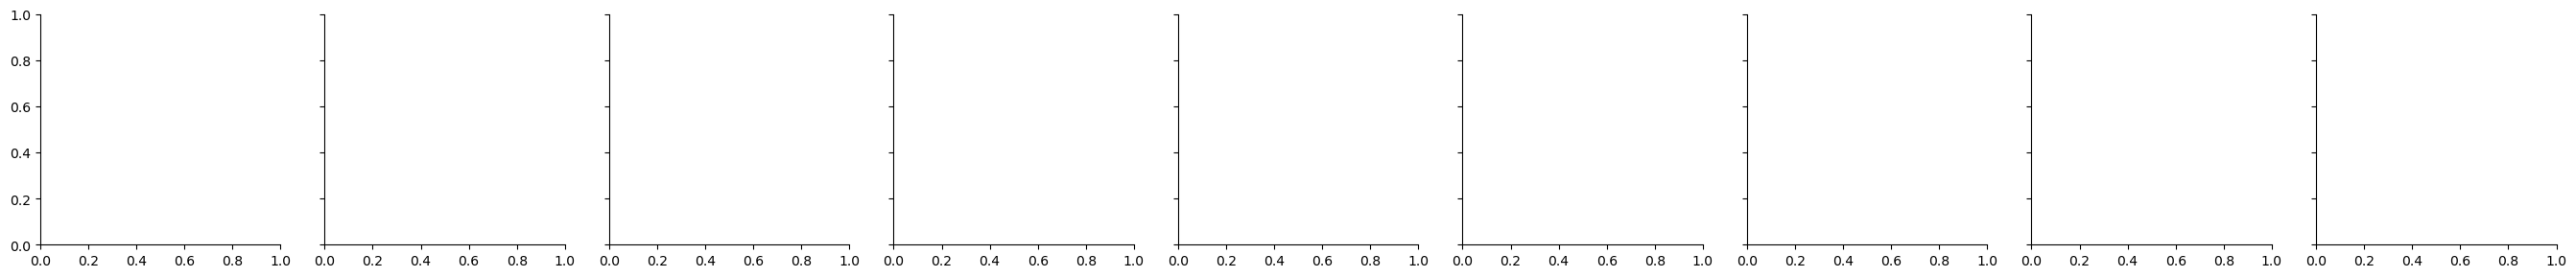

In [87]:
dist_grid = sns.FacetGrid(aeps_districts,col='District_office')
dist_grid.map();